In [ ]:
from IPython.core.display import display_html
display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)

In [1]:
from sys import path; path.insert(1,"../src");
import fubar; from importlib import reload; reload(fubar);

***
< [GMIT Data Analytics](https://web.archive.org/web/20201029063153/https://www.gmit.ie/computer-science-and-applied-physics/higher-diploma-science-computing-data-analytics-ict) | [Home](https://github.com/SeanOhAileasa) | [README](https://github.com/SeanOhAileasa/mls-t-test/blob/main/README.md) >

[![GMIT](https://github.com/SeanOhAileasa/SeanOhAileasa/blob/master/rc/gmit.png?raw=true)](https://web.archive.org/web/20201029063153/https://www.gmit.ie/computer-science-and-applied-physics/higher-diploma-science-computing-data-analytics-ict)

## Machine Learning & Statistics - Course Material 2021
### Topic: [t-test](https://nbviewer.jupyter.org/github/SeanOhAileasa/mls-t-test/blob/main/mls-t-test.ipynb)
***

Course material for the ``Machine Learning & Statistics`` module (5 Credits) of the ``Higher Diploma in Science in Computing (Data Analytics) (H.Dip)`` programme (75 Credits) at **Galway-Mayo Institute of Technology (GMIT)**.

- referenced external link - [Machine Learning & Statistics](https://nbviewer.jupyter.org/github/SeanOhAileasa/mls-machine-learning-statistics/blob/main/mls-machine-learning-statistics.ipynb)

In [2]:
from sys import path; path.insert(1,"../src")
from fubar import fFile,fMagic

In [3]:
%%script bash
grep -1 "def fFile" ../src/fubar.py -A 9

# repository ./SeanOhAileasa
def fFile(nParPath):
    """Start a file with its associated application.

Input: nParPath
Process: (os.path.realpath; os.startfile)
Output: file opened with associated application
"""
    from os import path,startfile
    return startfile(path.realpath(nParPath))
# --- END ---


<a id="top"></a>
***
## Table of Contents
***

## [Abstract](#abstract)

## [Introduction](#introduction) 

* [Simulation](#simulation) <br/><br/>
    * [Collections](#simulationnumpyrandomnormalFakeData) ``a`` ``b`` <br/><br/>
        * [Data Structure](#dataStructure) <br/><br/>
            * [Visualisation](#dataStructurevisualisation) <br/><br/>
* [T-Test](#solutionttest) <br/><br/>
    * [``scipy.stats``](#solutionscipystats) <br/><br/>
    * [``statsmodels.stats.weightstats``](#solutionstatsmodelsstatsweightstats)

## [Solution](#solution)

* [PDF](#solutionProbabilityDensityFunction) <br/><br/>
    * [Assumptions](#solutionAssumptions) <br/><br/>
    
## [Conclusion](#conclusion)

- &#x1F6A7;

***
## END

< [Table of Contents](#top) | [Introduction](#introduction) | [Solution](#solution) | [Conclusion](#conclusion) | [References](#references) >
<a id="abstract"></a>
***
## Abstract
***

- in comparison to machine learning the ``t-test`` is an old-style statistical test - there is an interesting relationship between the ``t-test`` and Ireland - William Sealy Gosset figured out a way to test if two sets of numbers are similar [1]

- the technique is a traditional way of looking at the world and trying to make predictions based on data - even though it is the older approach many think it is still the better approach (machine learning practitioners may not know much about these older methods) [1]

- the ``t-test`` is heavily used in the life/medical/physical sciences and provides a grounding in the ideas around machine learning [1]

- thinking about uncertainty in the world and datasets that have a pattern in them - that pattern may have a little bit of variability and a little bit of volatility (not a straightforward pattern) [1]

- there is a lot of theory behind ``t-tests`` (probability distributions and formulating hypothesis tests etc) - demonstrating the ``t-test`` from a computer science point of view [1]

- ``scipy.stats.ttest_ind`` is literally performing a ``t-test`` (passing arguments ``a`` and ``b``) [1]

```python
scipy.stats.ttest_ind(a,b)
```

- there is a little bit of preparation for the two inputs (``a`` and ``b``) but the preparation is really just unravelling those because all ``a`` is a collection of numbers and all ``b`` is a collection of numbers [1]

- the point is it is very easy to run statistical tests when you know a little bit of programming - many organisations spend a lot of money on ``SPSS`` and the main thing its used for is to run something like ``scipy.stats.ttest_ind(a,b)`` (in python) and get the exact same output [1]

- running machine learning code is fairly straightforward whereby a single statement actually does the heavy lifting - digging into a package to do the calculation is straightforward - could easily code up a ``t-test`` function but the interpretation of the outputs is where it is at [1]

- what is assumed before doing the test and how the assumptions are justified (running the machine learning code statement) then comes the interpretation of the results coming out of that test [1]

- generally speaking will get essentially two numbers in the output: i. the calculation of the actual ``t-statistic`` and; ii. some probability related to that value saying how likely it was to see that value based on the prior assumptions [1]

***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Solution](#solution) | [Conclusion](#conclusion) | [References](#references) >
<a id="introduction"></a>
***
## Introduction
***

- a ``t-test`` is a statistical test that looks for differences in two collections of numbers - asks did the two collections come from what looks like the same probability distribution (checking if two collections came from populations that have the same average) [1]

< [Table of Contents](#top) | [References](#references) >
<a id="simulation"></a>
***
### Simulation
***

- generating two collections of random numbers [2]

- ``m_a`` and ``m_b`` represents the mean of each collection of random numbers generated [2]

In [1]:
m_a,m_b=1.0,2.0

- ``s_a`` and ``s_b`` (technically not quite right) represents the standard deviation [2]

In [2]:
s_a,s_b=0.4,0.4

- ``N`` is just a convenience parameter thrown in [2]

In [3]:
N=40 # representing collection length

< [Table of Contents](#top) | [References](#references) >
<a id="simulationnumpyrandomnormalFakeData"></a>
***
###### Collections ``a`` ``b``
***

- creating collections ``a`` and ``b`` - both are just collections of numbers wrapped in ``numpy`` arrays - takes the collection of numbers and makes them another collection of numbers with all the ``numpy`` functionality [2]

In [4]:
import numpy as np

In [5]:
print("\n".join(np.__doc__.split("\n")[4:8]))

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation


- the numbers are the same but the ``numpy`` arrays produced are more efficient than the bog-standard collection from python [2]

- ``numpy.random.normal`` is going to generate random numbers on a bell-shaped curve [2]

- specifying the mean ``m_a`` (and ``m_b``) picks a number that comes out with an average around the mean location (``loc``) - generates a collection of numbers centred around $1.0$ [2]

In [6]:
m_a

1.0

In [7]:
m_b # collection centered around

2.0

- the ``scale`` basically means the spread according to ``s_a`` (and ``s_b``) - generally means ``s_a`` is unlikely to generate numbers bigger than $2.5$ and smaller than $-0.5$ (with total $40$) [2]

In [8]:
N # len of collection

40

In [9]:
s_a

0.4

In [10]:
print("\n".join(np.random.normal.__doc__.split("\n")[5:14]))

        The probability density function of the normal distribution, first
        derived by De Moivre and 200 years later by both Gauss and Laplace
        independently [2]_, is often called the bell curve because of
        its characteristic shape (see the example below).

        The normal distributions occurs often in nature.  For example, it
        describes the commonly occurring distribution of samples influenced
        by a large number of tiny, random disturbances, each with its own
        unique distribution [2]_.


In [11]:
a=np.random.normal(loc=m_a,scale=s_a,size=N)

In [12]:
a

array([0.72881369, 1.10953323, 1.23116135, 1.49675141, 0.91669004,
       1.00702177, 1.15305935, 0.75812175, 0.42152549, 0.72885244,
       0.61461782, 1.26332986, 1.19034458, 0.1810272 , 0.61977613,
       0.33888332, 0.85674   , 0.79377683, 0.93263915, 0.56314954,
       1.14149448, 0.9947962 , 1.29987563, 1.34172417, 0.65368019,
       0.50276457, 1.24633547, 0.83709992, 1.54615722, 1.21304785,
       0.90215752, 1.16567069, 0.93841826, 1.15656691, 0.31116253,
       0.85399015, 1.3033894 , 0.68092134, 0.90201417, 1.18269802])

In [13]:
s_b

0.4

In [14]:
b=np.random.normal(loc=m_b,scale=s_b,size=N)

In [15]:
b

array([1.69079754, 2.05202969, 2.19652318, 2.20105528, 1.77359496,
       1.75589603, 2.34410943, 2.01970435, 2.46326126, 2.26667622,
       2.59688154, 1.75787348, 2.13577762, 1.32907421, 1.51842646,
       1.98444797, 1.15271758, 2.71945361, 2.14011023, 1.59903318,
       1.87204422, 1.80876087, 1.59569523, 2.67417238, 2.07407938,
       1.54287756, 2.01607046, 2.78017518, 2.20521945, 2.78836208,
       1.4670203 , 1.16040522, 2.55369344, 2.16902027, 1.31095525,
       1.317068  , 2.0616786 , 2.15048667, 1.94303723, 1.43267859])

< [Table of Contents](#top) | [References](#references) >
<a id="dataStructure"></a>
***
###### Data Structure
***

- creating a data structure built from the ``numpy`` collection - using ``pandas`` allows different types for the columns (an abstraction on top of ``numpy``) [1]

In [16]:
import pandas as pd

In [17]:
print("\n".join(pd.__doc__.split("\n")[1:2]))

pandas - a powerful data analysis and manipulation library for Python


- creating a ``DataFrame`` of the ``a`` and ``b`` collections [2] 

- ``A`` is going to be in the column beside the ``a`` collection - ``B`` is going to be in the column beside the ``b`` collection [2]

- the ``a`` collection is meant to be centred around $1.0$ (beside the column called Category ``A``) - the ``b`` collection is meant to be centred around $2.0$ (beside the column called Category ``B``) [2]

In [18]:
print("\n".join(pd.DataFrame.__doc__.split("\n")[1:7]))

    Two-dimensional, size-mutable, potentially heterogeneous tabular data.

    Data structure also contains labeled axes (rows and columns).
    Arithmetic operations align on both row and column labels. Can be
    thought of as a dict-like container for Series objects. The primary
    pandas data structure.


In [19]:
df=pd.DataFrame(data={"Category":["A"]*len(a)+["B"]*len(b),"Value":np.hstack([a,b])})

In [20]:
df

,Category,Value
0,A,0.728814
1,A,1.109533
2,A,1.231161
3,A,1.496751
4,A,0.916690
...,...,...
75,B,1.317068
76,B,2.061679
77,B,2.150487
78,B,1.943037


< [Table of Contents](#top) | [References](#references) >
<a id="dataStructurevisualisation"></a>
***
###### Visualisation
***

- getting a picture of whats going on [2]

In [21]:
import matplotlib.pyplot as plt

In [22]:
print("\n".join(plt.__doc__.split("\n")[1:6]))

`matplotlib.pyplot` is a state-based interface to matplotlib. It provides
a MATLAB-like way of plotting.

pyplot is mainly intended for interactive plots and simple cases of
programmatic plot generation::


In [23]:
plt.style.use(style="fivethirtyeight")

In [24]:
plt.rcParams["figure.figsize"]=12.8,7.2

In [25]:
import seaborn as sns

In [26]:
print("\n".join(sns.catplot.__doc__.split("\n")[2:5]))

This function provides access to several axes-level functions that
show the relationship between a numerical and one or more categorical
variables using one of several visual representations. The ``kind``


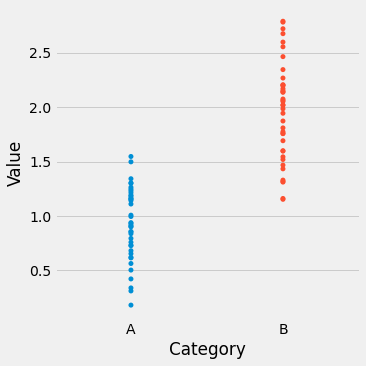

In [27]:
sns.catplot(x="Category",y="Value",jitter=False,data=df);

- the simulation games the system (knowing the collection ``a`` is grouped around the ``m_a`` and the collection ``b`` is grouped around ``m_b``) [3]

- in the real-world may have measurements for the collection ``a`` and more measurements for the collection ``b`` but not know if both are grouped around separate points [3]

- the question is does the collections (``a`` and ``b``) differ in general enough to justify saying the collection ``a`` is different to the collection ``b`` [3]

< [Table of Contents](#top) | [References](#references) >
<a id="solutionttest"></a>
***
### T-Test
***

- the ``t-test`` is testing the probability that the distribution from which the two generated collections (``a`` and ``b``) have the same mean [3]

- two different methods: i. ``scipy.stats`` and; ii. ``statsmodels.stats.weightstats`` [3]

< [Table of Contents](#top) | [References](#references) >
<a id="solutionscipystats"></a>
***
###### ``scipy.stats``
***

In [28]:
import scipy.stats as ss

In [29]:
print("\n".join(ss.__doc__.split("\n")[9:11]))

This module contains a large number of probability distributions as
well as a growing library of statistical functions.


- returning the p-value (``p_ss``) from ``scipy.stats.ttest_ind`` [3]

- function ``ttest_ind`` is asking what is the probability (based on a few assumptions) that the numbers in the collection ``a`` and the numbers in the collection ``b`` had an underlying distribution in which both had the same average value [3]

- testing if there is sufficient evidence that the values in ``a`` and ``b`` are grouped around the same point (simulation is gamed so that this is not the case) [3]

In [30]:
print("\n".join(ss.ttest_ind.__doc__.split("\n")[3:6]))

    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.


In [31]:
print("\n".join(ss.ttest_ind.__doc__.split("\n")[46:62]))

    Notes
    -----
    We can use this test, if we observe two independent samples from
    the same or different population, e.g. exam scores of boys and
    girls or of two ethnic groups. The test measures whether the
    average (expected) value differs significantly across samples. If
    we observe a large p-value, for example larger than 0.05 or 0.1,
    then we cannot reject the null hypothesis of identical average scores.
    If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%,
    then we reject the null hypothesis of equal averages.

    References
    ----------
    .. [1] https://en.wikipedia.org/wiki/T-test#Independent_two-sample_t-test

    .. [2] https://en.wikipedia.org/wiki/Welch%27s_t-test


In [32]:
t_ss,p_ss=ss.ttest_ind(a=a,b=b)

- probability of approximately zero returned - typically a p-value cutoff of $0.05$ is used (5% chance of making the wrong decision) [3]

In [33]:
print(f"{p_ss:0.2f}")

0.00


- the ``t-test`` is suggesting there is almost a 0% chance (zero probability) that the numbers in the collection ``a`` and the collection ``b`` are grouped around the same point on the y-axis [3]

- there is sufficient evidence to suggest the numbers in the collection ``a`` are different from the numbers in the collection ``b`` (specifically the mean of the distribution they came from) [3]

- can identify the numbers in both collections (``a`` and ``b``) are different by observing the plot - running the statistical test provide evidence that its reproducibly true [3] 

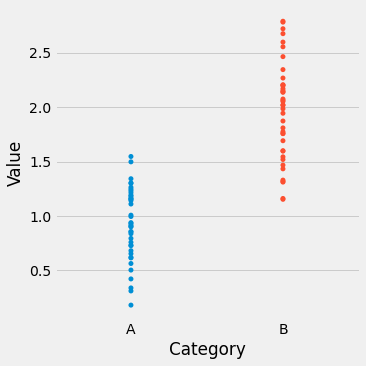

In [34]:
sns.catplot(x="Category",y="Value",jitter=False,data=df);

- now centering the collections (``a`` and ``b``) around the same value [3]

- collection ``a`` is unchanged [3] 

In [35]:
m_a

1.0

In [36]:
m_b=m_a

In [37]:
m_b

1.0

In [38]:
b=np.random.normal(loc=m_b,scale=s_b,size=N) # generate collection b

In [39]:
df=pd.DataFrame(data={"Category":["A"]*len(a)+["B"]*len(b),"Value":np.hstack([a,b])})

- gaming the system by making sure the numbers are both grouped around $1.0$ - on the plot (minds eye) looks like the ``b`` numbers are a little bit higher than the ``a`` numbers but they are not - its just random chance [3]

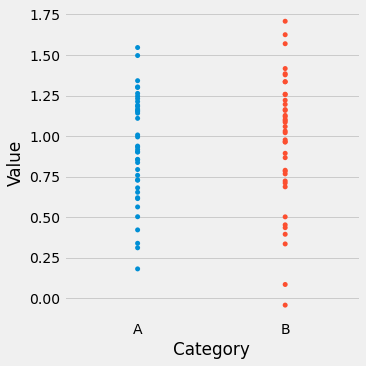

In [40]:
sns.catplot(x="Category",y="Value",jitter=False,data=df);

- now under the assumption that ``a`` and ``b`` are centred around the same point (gamed the system) [3]

In [41]:
t_ss,p_ss=ss.ttest_ind(a=a,b=b)
print(f"{p_ss:0.2f}% probability ({p_ss*10:.0f}% chance)") # typical cutoff 0.05

0.57% probability (6% chance)


- if the typical cutoff is $0.05$ then the statistical test does not provide any evidence they are not centred around same point - no evidence here to suggest that they are not centred around the same point because the output is too high a probability [3] 

< [Table of Contents](#top) | [References](#references) >
<a id="solutionstatsmodelsstatsweightstats"></a>
***
###### ``statsmodels.stats.weightstats``
***

In [42]:
import statsmodels.stats.weightstats as stat

In [43]:
print("\n".join(stat.__doc__.split("\n")[:1]))

Tests and descriptive statistics with weights


In [44]:
print("\n".join(stat.__doc__.split("\n")[9:16]))

References
----------
SPSS manual
SAS manual

This follows in large parts the SPSS manual, which is largely the same as
the SAS manual with different, simpler notation.


- alternative package returns the same p-value (``p_sm``) [3]

In [45]:
t_sm,p_sm,d_sm=stat.ttest_ind(x1=a,x2=b)

In [46]:
print(f"{p_sm:0.2f}% probability ({p_sm*10:.0f}% chance)") # typical cutoff 0.05

0.57% probability (6% chance)


- revert ``m_b`` to original mean value [3]

In [47]:
m_b=2.0

In [48]:
b=np.random.normal(loc=m_b,scale=s_b,size=N) # generate collection b

***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Introduction](#introduction) | [Conclusion](#conclusion) | [References](#references) >
<a id="solution"></a>
***
## Solution
***

- need to build up an intuition about what a ``t-test`` does [4]

- ``scipy.stats`` or ``statsmodels.stats.weightstats`` does the heavy lifting but its important to understand what assumptions are made going into the test and how the outputs are interpreted [4]

- the values in the collection ``a`` come from a distribution centered around ``m_a`` [4]

In [49]:
m_a # mean collection a

1.0

In [50]:
a # centered around 1.0

array([0.72881369, 1.10953323, 1.23116135, 1.49675141, 0.91669004,
       1.00702177, 1.15305935, 0.75812175, 0.42152549, 0.72885244,
       0.61461782, 1.26332986, 1.19034458, 0.1810272 , 0.61977613,
       0.33888332, 0.85674   , 0.79377683, 0.93263915, 0.56314954,
       1.14149448, 0.9947962 , 1.29987563, 1.34172417, 0.65368019,
       0.50276457, 1.24633547, 0.83709992, 1.54615722, 1.21304785,
       0.90215752, 1.16567069, 0.93841826, 1.15656691, 0.31116253,
       0.85399015, 1.3033894 , 0.68092134, 0.90201417, 1.18269802])

In [51]:
m_b # mean collection b

2.0

- if repeatedly asked to randomly pick a number between one and ten (generate one-thousand numbers) totally independent of each other then would expect if truly random (not great at as humans) out of the one-thousand numbers that $10\%$ would be $1$ and $10\%$ would be 2 and $10\%$ would be $3$ and so on - every number would have the same chance of being picked [4]

- whether that actually happened or not does not really matter - what matters is that as the number of guesses increases does the numbers stay uniform at having a 10% chance of being picked out (called a uniform distribution and is usually how randomness is thought of) [4]

In [52]:
print("\n".join(np.linspace.__doc__.split("\n")[1:5]))

    Return evenly spaced numbers over a specified interval.

    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].


In [53]:
x=np.linspace(start=-2,stop=4,num=1000)

< [Table of Contents](#top) | [References](#references) >
<a id="solutionProbabilityDensityFunction"></a>
***
###### PDF
***

- the blue curve represents the way in which the numbers in the collection ``a`` are generated (centered around ``m_a`` - the curve is very high around $1$) [4]

- the fact that the blue curve around the $1$ mark is very high means its very likely to see numbers that are around $1$ and its much less likely to see numbers out past $2$ - the curve is very close to the $0$ point on the x-axis for numbers less than appropriately $0$ or greater than appropriately $2$ - the curve stays above the line out to infinity in the positive direction and stays above the line out to infinity in the negative direction (hugging the x-axis compared to how high it is up around the value $1$) - the curve represents how unlikely it is to see certain values (within certain ranges) [4]

- the blue curve represents the uncertainty (probability density function ``PDF``) when generating numbers in the collection ``a`` and the red curve represents the uncertainty (``PDF``) when generating numbers in the collection ``b`` [4]

In [54]:
print("\n".join(ss.norm.pdf.__doc__.split("\n")[1:2]))

        Probability density function at x of the given RV.


In [55]:
y_a=ss.norm.pdf(x=x,loc=m_a,scale=s_a)

In [56]:
y_b=ss.norm.pdf(x=x,loc=m_b,scale=s_b) # pdf collection b

- in the real world this kind of randomness (blue curve) occurs very frequently - if measuring the heights of men in Ireland would probably find there is an average value (probably $1.6$ or $1.8$ metres) that most men in Ireland is centered around - it is very likely that when measuring a random height it will be somewhere in around $1.7$ - its very unlikely to see somebody up around $2.5$ and very unlikely to see somebody down around $0.5$ - those two extremes do happen but its just very unlikely - the vast majority of people are going to be centered around the same point [4]

- normal (blue) curve represents a different type of randomness when compared with picking a number between one and ten which is a uniform distribution (every value is likely) - collection ``a`` is a normal distribution with the generated values centered around $1$ - moving away from $1$ the values become less and less likely (the red line is the same thing but for the collection ``b``) [4]

- its important to note that in the real world the blue line and the red line are unknown (making the assumption they are nice bell shaped curves) - do not know where the tip of each of the two curves are [4]

- the ``t-test`` is checking (questions) if the the tip of both curves (i. blue curve and; ii. red curve) are at the same point or not [4]

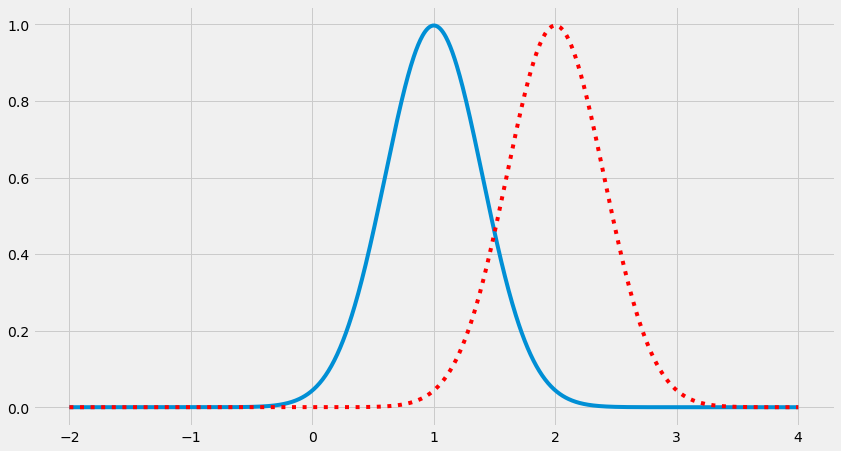

In [57]:
fig,ax=plt.subplots()
ax.plot(x,y_a)
ax.plot(x,y_b,"r:");

- centering both collections (``a`` and ``b``) around the same value ($1$) then the blue and red curves coincide [4]

In [58]:
m_a

1.0

In [59]:
m_b=m_a

In [60]:
m_b

1.0

- the ``t-test`` is checking if this assumption is true (both collections hitting the same point) [4]

- gamed the system (created a fake dataset) knowing the collection ``a`` and the collection ``b`` are different [4]

- the ``t-test`` is checking to see if they are the same or if there is any evidence that they are not the same (checking if the tips of the curves are the same or not) [4] 

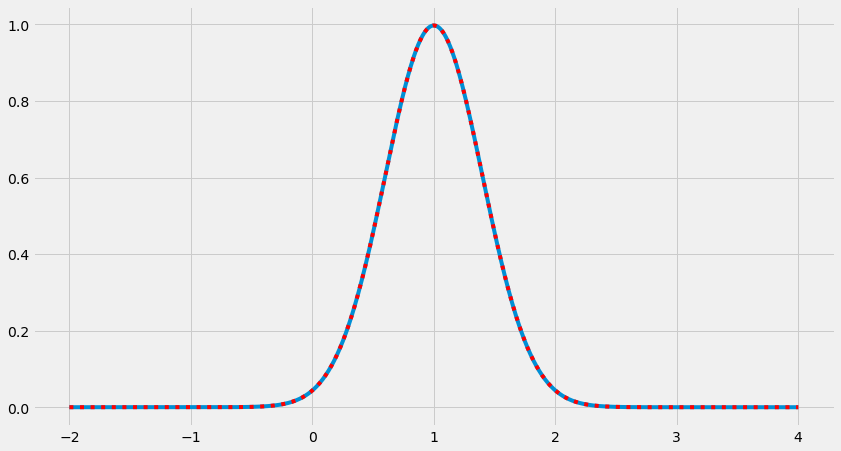

In [61]:
y_a=ss.norm.pdf(x=x,loc=m_a,scale=s_a)
y_b=ss.norm.pdf(x=x,loc=m_b,scale=s_b)
fig,ax=plt.subplots()
ax.plot(x,y_a)
ax.plot(x,y_b,"r:");

- revert ``m_b`` to original mean value [4]

In [62]:
m_b=2

< [Table of Contents](#top) | [References](#references) >
<a id="solutionAssumptions"></a>
***
###### Assumptions
***

- an underlying assumption is that the collection ``a`` (blue) looks like a bell shaped curve (normal probability distribution) and likewise the collection ``b`` (red) has a bell shaped curve (normal probability distribution) [4]

- demonstrating the standard ``t-test`` assumes the collection ``a`` (blue) and the collection ``b`` (red) are different - another assumption that is sometimes made (slightly different ``t-test``) is of the spread away from the central point - the central point of the collection ``a`` (blue) is $1$ on the x-axis and is quite a steep curve down towards $2$ and quite a steep curve down towards $0$ [4]

- it still has a normal probability distribution if the peak is a little bit lower and a bit more spread out - so when moving away from the central point maybe it moves away slower but is still a normal distribution only a bit more spread out [4] 

- another assumption in the ``t-test`` is often that the spread on the collection ``a`` (blue) curve steepness as its falls away is the same as the steepness of the collection ``b`` (red) curve as its falls away therefore can determine both collections have the same standard deviation [4]

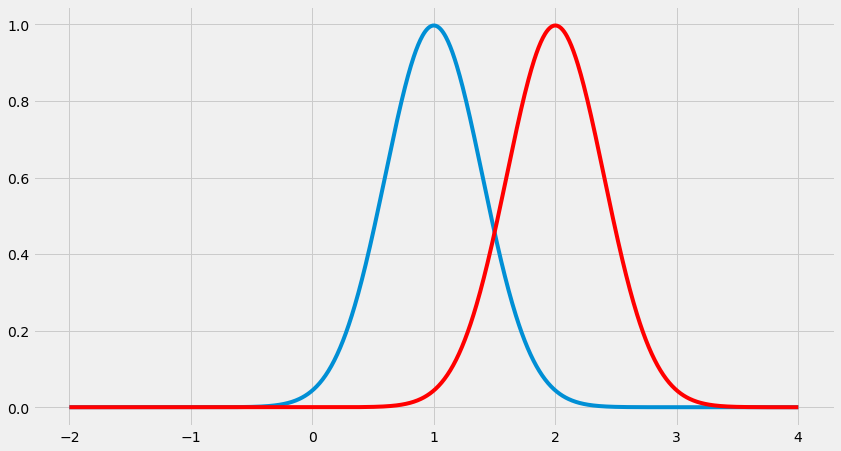

In [63]:
y_a=ss.norm.pdf(x=x,loc=m_a,scale=s_a)
y_b=ss.norm.pdf(x=x,loc=m_b,scale=s_b)
fig,ax=plt.subplots()
ax.plot(x,y_a)
ax.plot(x,y_b,"r");

<!-- - refer [Appendix](#appendix-df) to view the full dataset <a id="go-back-df"></a> -->
<!-- print(fGetModuleType(___x___),fDocumentation(___x___)) -->
***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Introduction](#introduction) | [Solution](#solution) | [References](#references) >
<a id="conclusion"></a>
***
## Conclusion
***

- there is all sorts of problems in statistical tests that are predictable problems and these arise because there is inherence uncertainty in statistical tests [1]

***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Introduction](#introduction) | [Solution](#solution) | [Conclusion](#conclusion) | [References](#references) >
<a id="references"></a>
***
## References
***
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1] I. McLoughlin, "t-tests in Python setup," GMIT, October 2020.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2] I. McLoughlin, "Simulating data for a t-test," GMIT, October 2020.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3] I. McLoughlin, "Running a t-test in Python," GMIT, October 2020.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4] I. McLoughlin, "Interpreting a t-test," GMIT, October 2020.

***
## END

< [Table of Contents](#top) | [Abstract](#abstract) | [Introduction](#introduction) | [Solution](#solution) | [Conclusion](#conclusion) | [References](#references) >
<a id="appendix"></a>
***
## Appendix
***

In [64]:
# fFile("./hide/01-t-tests in Python setup - 18-10-2020.mp4")
# fFile("./hide/02-Simulating data for a t-test - 18-10-2020.mp4")
# fFile("./hide/03-Running a t-test in Python - 18-10-2020.mp4")
# fFile("./hide/04-Interpreting a t-test - 18-10-2020.mp4")
# fFile("./hide/05-Errors and playing with t-tests - 18-10-2020.mp4")
# fFile("./hide/06-From t-tests to ANOVA - 23-10-2020.mp4")
# fFile("./hide/ANOVA/02-Introduction to ANOVA notebook___[Oct 2019].mp4")
# fFile("./hide/ANOVA/03-Samples and populations___[Oct 2019].mp4")
# fFile("./hide/ANOVA/04-Hypothesis testing errors___[Oct 2019].mp4")
# fFile("./hide/ANOVA/05-Hypothesis testing terminology___[Oct 2019].mp4")
# fFile("./hide/ANOVA/06-Calculation of the t statistic___[Oct 2019].mp4")

***
## END

# END JUPYTER NOTEBOOK